In [1]:
# Özellikleri belirtildiğinde kişilerin 10 yıl içerisinde kalp hastasığına yakalanma riskini tahmin eden model

# Değişkenler

#male : erkek mi?
#age : yaş
#education : eğitim
#current smoker:sıgara iciyor mu
#cigs per day:gunde kac sigara iciyor
#bp meds:kan basıncı
#prevalent stroke : daha önceden inme indi mi
#revalent hyp:yüksek kan basıncı var mı yok mu
#diabets:diyabet mi değil mi
#tot chol:toplam kolesterol seviyesi
#sys bp:sistolik kan basıncı
#dia bp:diastolik kan basıncı
#bmı:vücüt kitle indexi
#heart rate:kalp atış hızı
#glucose:glikoz seviyesi

#TenYearChd:10 yıl boyunca kalp rahatsızlığı riski var mı?


# 1. Exploratory Data Analysis
# 2. Data Preprocessing
# 3. Model & Prediction
# 4. Model Evaluation
# 5. Model Validation: Holdout
# 6. Model Validation: 10-Fold Cross Validation

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split,cross_validate

In [3]:
df=pd.read_csv("framingham.csv")

In [4]:
df.head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [6]:
#Bağımlı değişkeni inceleyelim

In [7]:
df["TenYearCHD"].value_counts()

TenYearCHD
0    3594
1     644
Name: count, dtype: int64

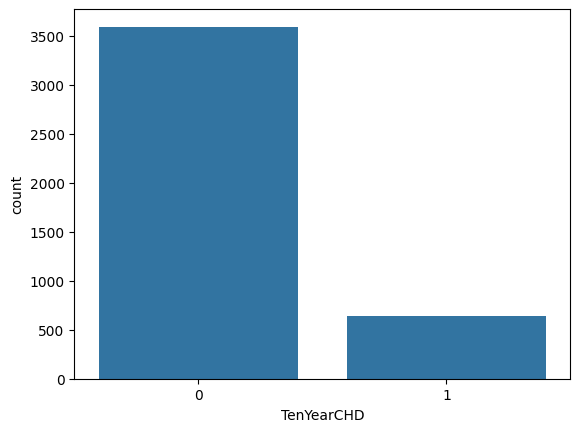

In [8]:
sns.countplot(x="TenYearCHD" , data=df);

In [9]:
100  * df["TenYearCHD"].value_counts() //len(df["TenYearCHD"])

TenYearCHD
0    84
1    15
Name: count, dtype: int64

In [10]:
#Elimizde dengesiz dağılıma sahip bir veriseti var.

In [11]:
#Bağımsız değişkenleri inceleyelim.

In [12]:
cols=df.drop("TenYearCHD", axis = 1)

In [13]:
def plot_numerical_col(dataframe , numerical_col):
    dataframe[numerical_col].hist(bins=20)
    plt.xlabel(numerical_col)
    plt.show()

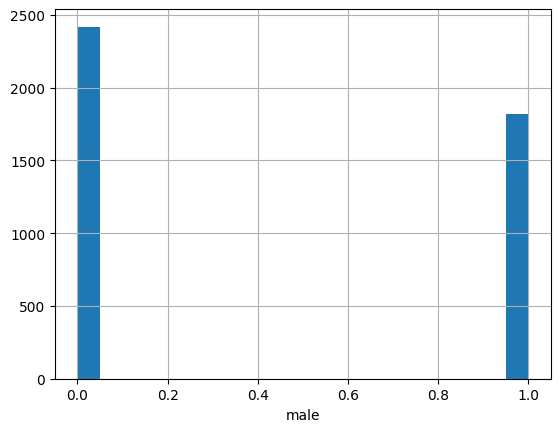

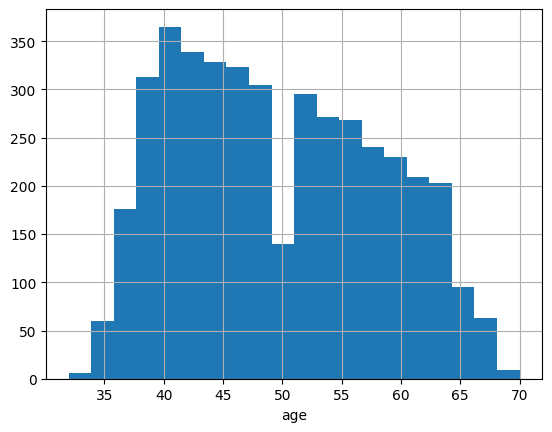

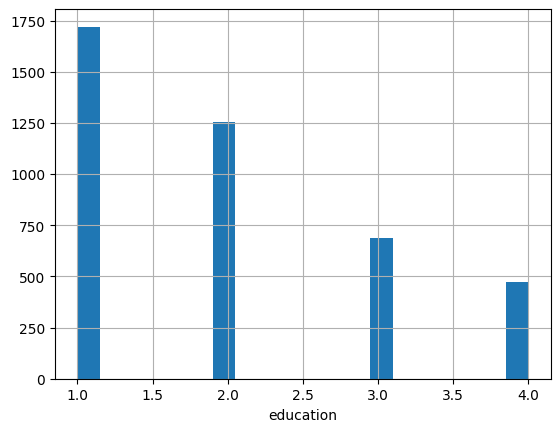

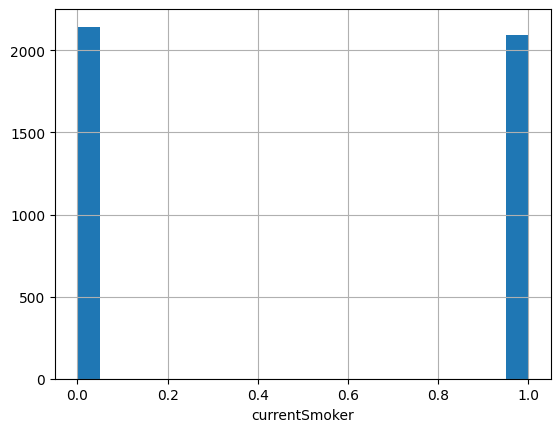

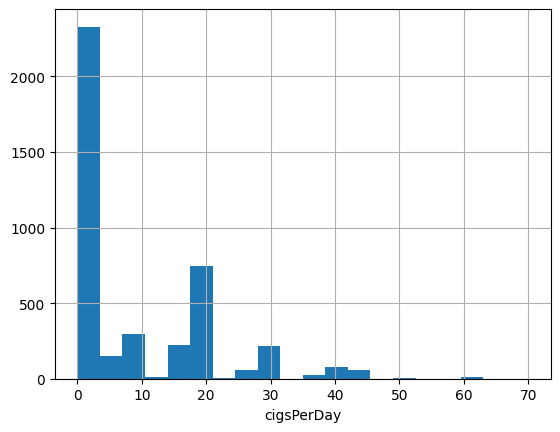

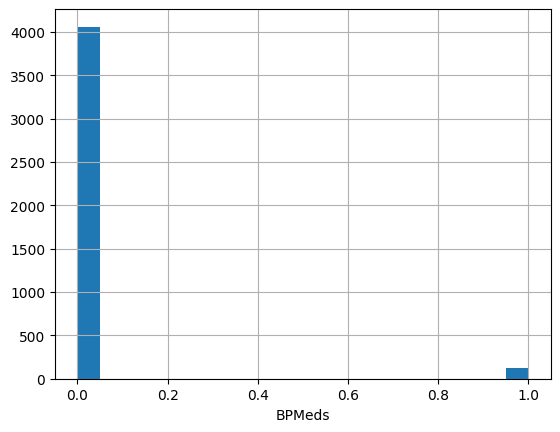

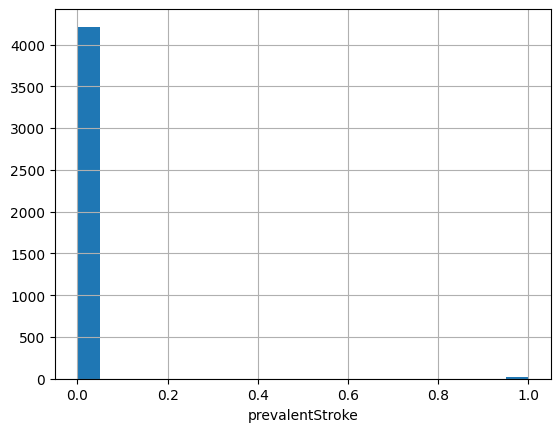

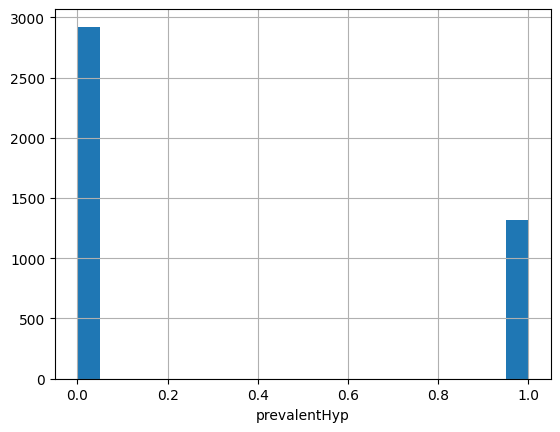

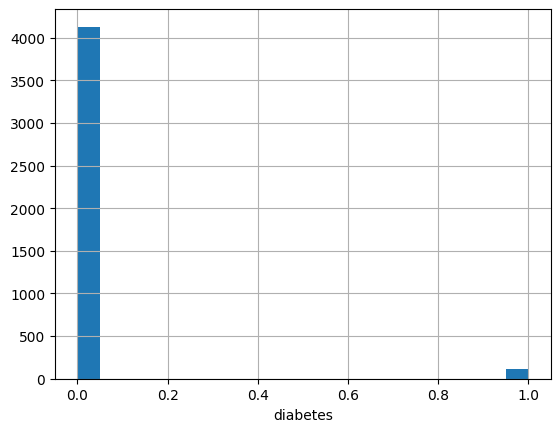

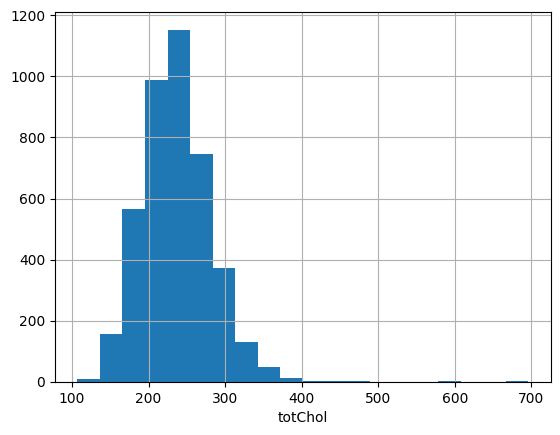

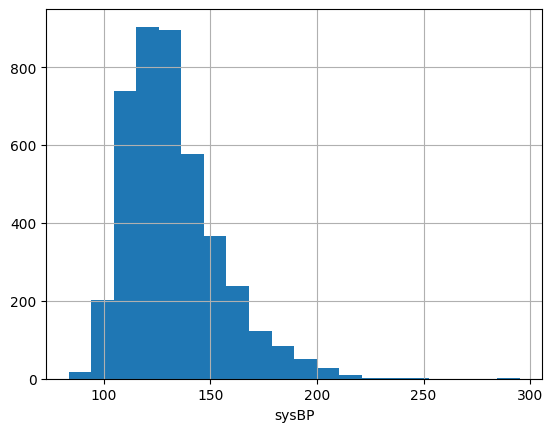

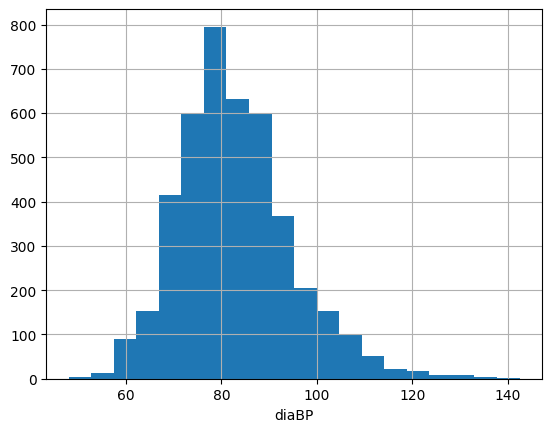

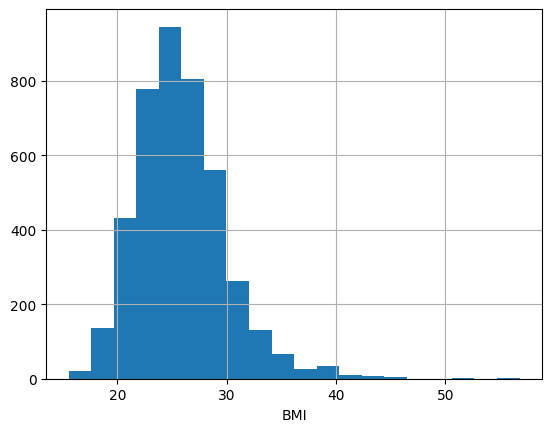

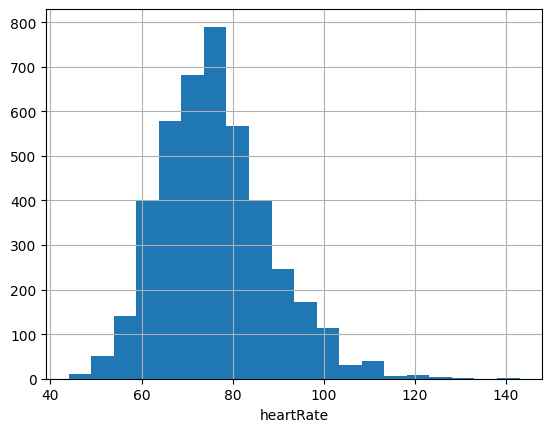

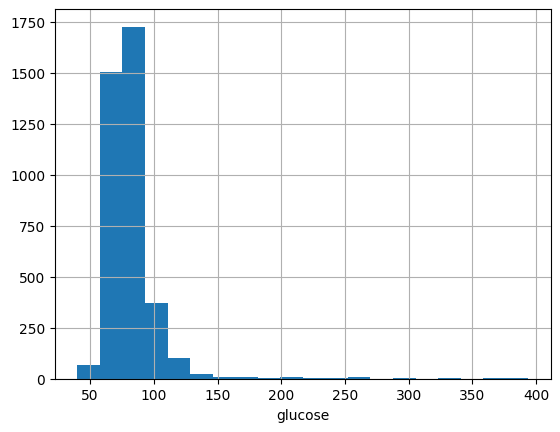

In [14]:
for col in cols.columns:
    plot_numerical_col(cols,col)

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
male,4238.0,0.429212,0.495022,0.00,0.00,0.0,1.000,1.0
age,4238.0,49.584946,8.572160,32.00,42.00,49.0,56.000,70.0
education,4133.0,1.978950,1.019791,1.00,1.00,2.0,3.000,4.0
currentSmoker,4238.0,0.494101,0.500024,0.00,0.00,0.0,1.000,1.0
cigsPerDay,4209.0,9.003089,11.920094,0.00,0.00,0.0,20.000,70.0
BPMeds,4185.0,0.029630,0.169584,0.00,0.00,0.0,0.000,1.0
prevalentStroke,4238.0,0.005899,0.076587,0.00,0.00,0.0,0.000,1.0
prevalentHyp,4238.0,0.310524,0.462763,0.00,0.00,0.0,1.000,1.0
diabetes,4238.0,0.025720,0.158316,0.00,0.00,0.0,0.000,1.0
totChol,4188.0,236.721585,44.590334,107.00,206.00,234.0,263.000,696.0


In [16]:
##########################
# Target vs Features
##########################

In [17]:
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")

for col in cols:
    target_summary_with_num(df, "TenYearCHD", col)

                male
TenYearCHD          
0           0.410684
1           0.532609


                  age
TenYearCHD           
0           48.767668
1           54.145963


            education
TenYearCHD           
0            2.002282
1            1.848726


            currentSmoker
TenYearCHD               
0                0.489983
1                0.517081


            cigsPerDay
TenYearCHD            
0             8.710401
1            10.629283


              BPMeds
TenYearCHD          
0           0.023367
1           0.064771


            prevalentStroke
TenYearCHD                 
0                  0.003895
1                  0.017081


            prevalentHyp
TenYearCHD              
0               0.275737
1               0.504658


            diabetes
TenYearCHD          
0           0.019199
1           0.062112


               totChol
TenYearCHD            
0           235.172530
1           245.388976


                 sysBP
TenYearCHD            
0     

In [18]:
######################################################
# Data Preprocessing (Veri Ön İşleme)
######################################################

In [19]:
#Eksik değer analizi:

In [20]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [21]:
for col in ["education","cigsPerDay","BPMeds","totChol","BMI","glucose","heartRate"]:
    df[col]=df[col].fillna(df[col].median())

In [22]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [23]:
#Aykırı değer analizi:

In [24]:
def replace_with_thresholds(dataframe, variable):  #eğer aykırı değer varsa  , silme ancak hesaplanan eşik değeriyle doldur.
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [25]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):   #bir sütündaki eşik değeri hesaplar.
    quartile1 = dataframe[col_name].quantile(q1)                 #normalde q1 ve q3 değerleri 0.25 ile 0.75 arasında verilir
    quartile3 = dataframe[col_name].quantile(q3)                 #ancak burada aykırı değerlere daha toleranslı davrandık.
    interquantile_range = quartile3 - quartile1                  #veri kümesinin %5 lik ve %95 dilimlerinindeki değeri hesapladık.
    up_limit = quartile3 + 1.5* interquantile_range
    low_limit = quartile1 - 1.5* interquantile_range
    return low_limit, up_limit

In [26]:
def check_outlier(dataframe, col_name):         #bir sütündaki eşik değeri kullanarak aykırı değerleri bulur 
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [27]:
for col in cols:
    print(col , check_outlier(df,col))

male False
age False
education False
currentSmoker False
cigsPerDay False
BPMeds True
prevalentStroke True
prevalentHyp False
diabetes True
totChol True
sysBP True
diaBP False
BMI True
heartRate False
glucose True


In [28]:
#BPMeds,prevalentStroke,diabetes bu sütunlar 0 ve 1 den oluştuğu için herhangi bir outlier olamaz.

In [29]:
for col in ["totChol","sysBP","BMI","glucose"]:  
    replace_with_thresholds(df , col)

In [30]:
for col in cols:
    print(col , check_outlier(df,col))

male False
age False
education False
currentSmoker False
cigsPerDay False
BPMeds True
prevalentStroke True
prevalentHyp False
diabetes True
totChol False
sysBP False
diaBP False
BMI False
heartRate False
glucose False


In [31]:
#Değişken ölçeklendirme:

In [32]:
for col in cols:
    df[col]=RobustScaler().fit_transform(df[[col]])

In [33]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,-0.714286,1.0,0.0,0.00,0.0,0.0,0.0,0.0,-0.696429,-0.814815,-0.806723,0.316692,0.333333,-0.076923,0
1,0.0,-0.214286,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.285714,-0.259259,-0.067227,0.671710,1.333333,-0.153846,0
2,1.0,-0.071429,-0.5,1.0,1.00,0.0,0.0,0.0,0.0,0.196429,-0.018519,-0.134454,-0.012103,0.000000,-0.615385,0
3,0.0,0.857143,0.5,1.0,1.50,0.0,0.0,1.0,0.0,-0.160714,0.814815,0.873950,0.641452,-0.666667,1.923077,1
4,0.0,-0.214286,0.5,1.0,1.15,0.0,0.0,0.0,0.0,0.910714,0.074074,0.134454,-0.463944,0.666667,0.538462,0


In [34]:
#Model

In [35]:
y=df["TenYearCHD"]
X=df.drop(["TenYearCHD"] , axis=1)

In [36]:
log_model = LogisticRegression().fit(X , y)

In [37]:
log_model.intercept_

array([-2.59751651])

In [38]:
log_model.coef_

array([[ 0.4994711 ,  0.86268455, -0.02991625,  0.01155405,  0.42701931,
         0.2389937 ,  0.79653859,  0.23149935,  0.37334242,  0.10662311,
         0.37730065, -0.03487689,  0.00878774, -0.02359673,  0.09318625]])

In [39]:
# y=-2.59+ x1*0.49 + x2*0.86 - x3*0.02 + x4*0.01 + .... + x15*0.09

In [40]:
y_pred = log_model.predict(X)

In [41]:
#Model Evalution

In [42]:
#karmaşıklık matrisinin grafiği veren fonksiyon

def plot_confusion_matrix(y,y_pred):
    acc=round(accuracy_score(y,y_pred) , 2)
    cm=confusion_matrix(y,y_pred)
    sns.heatmap(cm , annot=True , fmt= ".0f")
    plt.xlabel("y_pred")
    plt.ylabel('y')
    plt.title('Accuary Score: {}'.format(acc , size=10))
    plt.show()

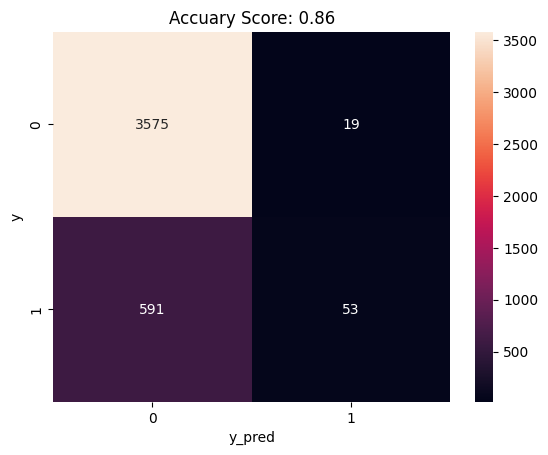

In [43]:
plot_confusion_matrix(y,y_pred)

In [44]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      3594
           1       0.74      0.08      0.15       644

    accuracy                           0.86      4238
   macro avg       0.80      0.54      0.53      4238
weighted avg       0.84      0.86      0.80      4238



In [45]:
#Model validation: holdout

In [46]:
X_train , X_test , y_train , y_test = train_test_split(X , y ,test_size = 0.20,
                                                      random_state=17)

In [47]:
log_model = LogisticRegression().fit(X_train,y_train)

In [48]:
y_pred = log_model.predict(X_test)

In [49]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91       709
           1       0.55      0.04      0.08       139

    accuracy                           0.84       848
   macro avg       0.69      0.52      0.50       848
weighted avg       0.79      0.84      0.77       848



In [50]:
#Model validation * 10-Fold Cross validation

In [51]:
y=df["TenYearCHD"]
X=df.drop(["TenYearCHD"],axis=1)

In [52]:
log_model = LogisticRegression().fit(X,y)

cv_result = cross_validate(log_model,
                          X,
                          y,
                          cv=5,
                          scoring=["accuracy", "precision", "recall", "f1", "roc_auc"])

In [53]:
cv_result["test_accuracy"].mean()

0.8537050856519123

In [54]:
cv_result["test_precision"].mean()

0.6827260458839406

In [55]:
cv_result["test_recall"].mean()

0.07452761627906976

In [56]:
cv_result["test_f1"].mean()

0.133832377999555

In [57]:
cv_result["test_roc_auc"].mean()

0.7241216277158219

In [58]:
#elimizde dengesiz dağılıma sahip bir veriseti var , bu verisetine çeşitli yöntemler uygulayarak dengeli hale getirmeye çalışalım.

In [59]:
#Resampling 

In [60]:
#OverSampling  - azınlık sınıfına ait verileri kopyalayrak verisetinin dengeli bir hale gelmesini sağlar.
                 #overfittinge neden olabilir.Veri seti küçükse bu yöntem kullanılabilir.

In [61]:
y_train.value_counts()

TenYearCHD
0    2885
1     505
Name: count, dtype: int64

In [65]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy = 'minority')
X_randomover , y_randomover = oversample.fit_resample(X_train , y_train)

In [67]:
y_randomover.value_counts()

TenYearCHD
0    2885
1    2885
Name: count, dtype: int64

In [69]:
log_model.fit(X_randomover , y_randomover)
y_pred = log_model.predict(X_test)

In [70]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.91      0.67      0.77       709
           1       0.28      0.66      0.39       139

    accuracy                           0.67       848
   macro avg       0.60      0.66      0.58       848
weighted avg       0.81      0.67      0.71       848



In [ ]:
#Smote Oversampling - Overfitting'i önlemek için azınlık sınıfından sentetik önrekler oluşturulması

In [71]:
y_train.value_counts()

TenYearCHD
0    2885
1     505
Name: count, dtype: int64

In [73]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_smote , y_smote  = oversample.fit_resample(X_train , y_train)

In [74]:
y_smote.value_counts()

TenYearCHD
0    2885
1    2885
Name: count, dtype: int64

In [75]:
log_model.fit(X_smote , y_smote)
y_pred = log_model.predict(X_test)

In [76]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.91      0.68      0.78       709
           1       0.29      0.68      0.41       139

    accuracy                           0.68       848
   macro avg       0.60      0.68      0.59       848
weighted avg       0.81      0.68      0.72       848



In [ ]:
#Undersampling - Çoğunluk sınıfına ait örneklerin çıkarılmasıyla veri setini dengeleme tekniğidir.
#Büyük veri setine sahipse kullanılabilir , Rastgele seçimden dolayı bilgi kaybı yaşanabilir.

In [77]:
y_train.value_counts()

TenYearCHD
0    2885
1     505
Name: count, dtype: int64

In [87]:
from imblearn.under_sampling import RandomUnderSampler
ranUnSample = RandomUnderSampler()
X_ranUnSample , y_ranUnSample = ranUnSample.fit_resample(X_train , y_train)

In [88]:
y_ranUnSample.value_counts()

TenYearCHD
0    505
1    505
Name: count, dtype: int64

In [89]:
log_model.fit(X_ranUnSample , y_ranUnSample)
y_pred = log_model.predict(X_test)

In [90]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.91      0.68      0.78       709
           1       0.29      0.66      0.40       139

    accuracy                           0.67       848
   macro avg       0.60      0.67      0.59       848
weighted avg       0.81      0.67      0.71       848

